<a href="https://colab.research.google.com/github/UmaAgrawal501/uma-wasserstoff-AiInternTask/blob/main/DataMapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
!pip install pytesseract
!pip install transformers

In [79]:
import cv2
import pytesseract
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt



In [80]:
img = cv2.imread('/content/drive/MyDrive/dnn/road.jpg')


In [81]:
from google.colab.patches import cv2_imshow

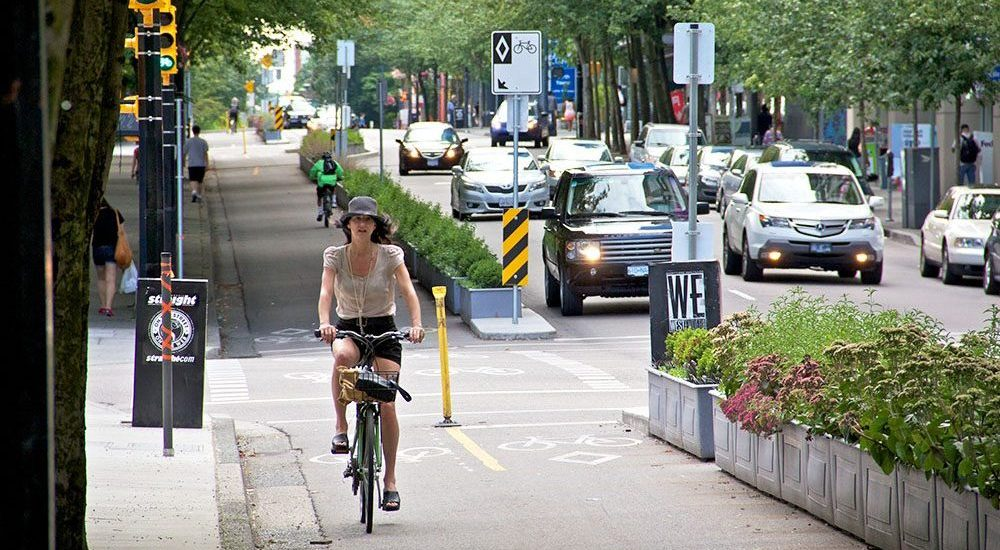

-1

In [114]:
cv2_imshow(img)
cv2.waitKey(0)


In [115]:
config_file = '/content/drive/MyDrive/dnn/ssd_mobilenet_v3_large_coco_2020_01_14 (1).pbtxt'
frozen_model = '/content/drive/MyDrive/dnn/frozen_inference_graph (1).pb'

In [116]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [117]:
classLabels = []
file_name = '/content/drive/MyDrive/dnn/labels.txt'
with open(file_name, 'rt') as fpt:
  classLabels = fpt.read().rstrip('\n').split('\n')

In [118]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [119]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x79df4e0e2570>

In [120]:
classIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [121]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(classIndex.flatten(), confidence.flatten(), bbox):
  cv2.rectangle(img, boxes, (255, 0, 0), 2)
  cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

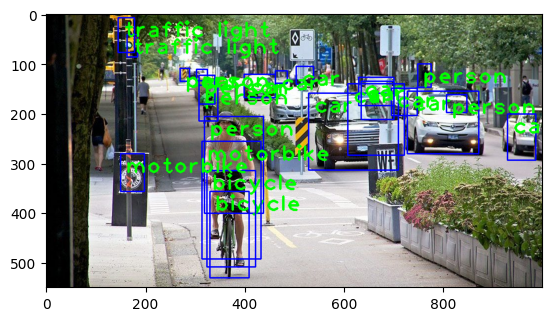

In [122]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [90]:
objects = ['Sachin Ramesh Tendulkar (/ˌsʌtʃɪn tɛnˈduːlkər/ ⓘ; pronounced [sətɕin teːɳɖulkəɾ]; born 24 April 1973) is an Indian former international cricketer who captained the Indian national team. He is widely regarded as one of the greatest batsmen in the history of cricket.[5] Hailed as the worlds most prolific batsman of all time, he is the all-time highest run-scorer in both ODI and Test cricket with more than 18,000 runs and 15,000 runs, respectively.[6]']

In [91]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [104]:
texts = []
for obj in objects:
    x, y, w, h = boxes
    image = cv2.imread('/content/drive/MyDrive/dnn/img1.jpg')
    if image is not None: # Check if image loaded successfully
        roi = image[y:y+h, x:x+w]
        text = pytesseract.image_to_string(roi, lang='eng', config='--psm 11')
        texts.append(text)
    else:
        print(f"Failed to load image: {obj}")



In [106]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
preprocessed_texts = []
for text in texts:
    inputs = tokenizer(text, return_tensors='pt')
    preprocessed_texts.append(inputs)



In [107]:
tokenizer = BertTokenizer.from_pretrained('https://huggingface.co/google-bert/bert-base-uncased/tree/main')
preprocessed_texts = []
for text in texts:
    inputs = tokenizer(text, return_tensors='pt')
    preprocessed_texts.append(inputs)

# Generate BERT embeddings
model = BertModel.from_pretrained('bert-base-uncased')
embeddings = []
for inputs in preprocessed_texts:
    outputs = model(**inputs)
    embeddings.append(outputs.last_hidden_state[:, 0, :])



/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2057: FutureWarning: Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated and won't be possible anymore in v5. Use a model identifier or the path to a directory instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/utils/hub.py:585: FutureWarning: Using `from_pretrained` with the url of a file (here https://huggingface.co/google-bert/bert-base-uncased/tree/main) is deprecated and won't be possible anymore in v5 of Transformers. You should host your file on the Hub (hf.co) instead and use the repository ID. Note that this is not compatible with the caching system (your file will be downloaded at each execution) or multiple processes (each process will download the file in a different temporary file).
  warnings.warn(


(…)/google-bert/bert-base-uncased/tree/main:   0%|          | 0.00/155k [00:00<?, ?B/s]

(…)/google-bert/bert-base-uncased/tree/main:   0%|          | 0.00/155k [00:00<?, ?B/s]

In [108]:
model = BertModel.from_pretrained('bert-base-uncased')
embeddings = []
for inputs in preprocessed_texts:
    outputs = model(**inputs)
    embeddings.append(outputs.last_hidden_state[:, 0, :])



In [112]:
summaries = []
def generate_summary(embedding):
    # Replace this with your actual summarization logic
    return "Summary of shape {}".format(embedding.shape) # Placeholder removed curly braces around shape
for embedding in embeddings:
    # Use text ranking, classification, or abstractive summarization to generate summary
    summary = generate_summary(embedding)
    summaries.append(summary)

print(summaries)


['Summary of shape torch.Size([1, 768])']
